<a href="https://colab.research.google.com/github/seismopond/earthshake/blob/master/usgs_catalog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading and Visualizing Earthquake Data

Updated May 2nd, 2020

**Jupyter Notebook Author** Kritttanon "Pond" Sirorattanakul, Caltech Seismo Lab (ksirorat@caltech.edu)

This is a Jupyter notebook aims to demonstrate how one could download the earthquake data from USGS website (ANSS Comprehensive Earthquake Catalog - ComCat)

### Python modules
* python 3
* matplotlib
* numpy
* pandas

### External packages
* obspy
* fiona
* pyproj
* libcomcat
* earthquake-impact-utils

### Installing packages

In [4]:
!pip install obspy
!pip install fiona
!pip install pyproj
!pip install git+https://github.com/usgs/earthquake-impact-utils
!pip install git+https://github.com/usgs/libcomcat

  Cloning https://github.com/usgs/earthquake-impact-utils to /tmp/pip-req-build-yiwhnaji
  Running command git clone -q https://github.com/usgs/earthquake-impact-utils /tmp/pip-req-build-yiwhnaji
  Created wheel for earthquake-impact-utils: filename=earthquake_impact_utils-0.8.17+11.gd3fac65-cp36-none-any.whl size=7247895 sha256=6025ee936c64040c1bf368c49bc295dc3399dea71394032ccfb9932f84d057a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-7km9y_ub/wheels/8f/6d/33/43befb0129ef11515c1f0b353855f99aca4cd78dc14fdc692d
Successfully built earthquake-impact-utils
^C
  Cloning https://github.com/usgs/libcomcat to /tmp/pip-req-build-27mk068q
  Running command git clone -q https://github.com/usgs/libcomcat /tmp/pip-req-build-27mk068q
  Created wheel for libcomcat: filename=libcomcat-2.0.2-cp36-none-any.whl size=831540 sha256=37d0177dce58bca4d1134e462cf5936c82452c0ef3517108dcbaa70c89178153
  Stored in directory: /tmp/pip-ephem-wheel-cache-uap4bb_h/wheels/43/a8/a7/c79cd8c34c1be45a3b50c851bbb0286

# Importing related libraries

In [0]:
%matplotlib inline
from datetime import datetime
from IPython.display import display, HTML

import matplotlib.pyplot as plt

from libcomcat.search import get_event_by_id, search
from libcomcat.dataframes import (get_detail_data_frame, get_dyfi_data_frame,
                                  get_history_data_frame, get_magnitude_data_frame,
                                  get_pager_data_frame, get_phase_dataframe,
                                  get_summary_data_frame)

# Searching for events in USGS ANSS Comcat Catalog

We can specify the date range, region, and magnitude range. The region can be defined by using a rectangle or a circle defined by distance away from a point.

In [2]:
# Using rectangular box
nankai_events = search(starttime=datetime(2008, 1, 1, 00, 00), endtime=datetime.now(),
                   minlatitude=29, maxlatitude=36, minlongitude=129, maxlongitude=138,
                   minmagnitude=4, maxmagnitude=9)
print("Returned %s events" % len(nankai_events))

NameError: ignored

In [0]:
# Using radius in degree
nankai_events_circle_deg =  search(starttime=datetime(2008, 1, 1, 00, 00), endtime=datetime.now(),
                              maxradius=5, latitude=33, longitude=133,
                              minmagnitude=4, maxmagnitude=9)
print("Returned %s events" % len(nankai_events_circle_deg))

# Using radius in km
nankai_events_circle_km = search(starttime=datetime(2008, 1, 1, 00, 00), endtime=datetime.now(),
                              maxradiuskm=300, latitude=33, longitude=133,
                              minmagnitude=4, maxmagnitude=9)
print("Returned %s events" % len(nankai_events_circle_km))

Returned 1211 events
Returned 437 events


# Extract information about the events

We can get the extract the detailed summary of the event in a panda dataframe.

In [0]:
nankai_summary_df = get_summary_data_frame(nankai_events)
nankai_summary_df.sort_values('magnitude')
nankai_summary_df.head()

,id,time,location,latitude,longitude,depth,magnitude,alert,url,eventtype,significance
0,usp000fvxf,2008-01-03 19:21:13.350,"near the south coast of Honshu, Japan",33.674,137.028,351.5,4.2,None,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,271
1,usp000fw99,2008-01-08 19:25:30.950,"near the south coast of Honshu, Japan",33.300,137.245,370.1,4.2,None,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,271
2,usp000fwf1,2008-01-11 06:47:51.950,"Kyushu, Japan",31.679,131.934,48.1,4.2,None,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,271
3,usp000fx6e,2008-01-21 22:32:44.440,"Kyushu, Japan",30.964,131.852,30.4,4.0,None,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,246
4,usp000fx8h,2008-01-22 20:54:29.870,"Ryukyu Islands, Japan",29.439,129.102,46.9,4.3,None,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,284


In [0]:
nankai_detailed_df = get_detail_data_frame(nankai_events, get_all_magnitudes=False,
                          get_tensors='none',get_focals='preferred',
                          get_moment_supplement=False,verbose=False)
nankai_detailed_df.head()

KeyboardInterrupt: ignored

We can extract phase picks for a selected event.

In [0]:
eventid = nankai_summary_df.id[0]
event_picked = get_event_by_id(eventid, includesuperseded=True)

phase_df = get_phase_dataframe(event_picked)
phase_df = phase_df[phase_df['Status'] == 'manual']
phase_df['Channel'] = phase_df['Channel'].str.replace('.--.--','')
phase_df.head()

,Channel,Distance,Azimuth,Phase,Arrival Time,Status,Residual,Weight,Agency
0,IR.MJAR,3.02,18.4,P,2008-01-03 19:22:12.600,manual,-0.3,1.0,
1,IR.MAJO,3.02,18.3,P,2008-01-03 19:22:12.780,manual,-0.2,1.0,
2,IR.YSS,13.96,16.5,P,2008-01-03 19:24:17.210,manual,0.9,1.0,
3,IR.PETK,24.40,31.0,P,2008-01-03 19:26:01.310,manual,0.4,1.0,
4,IR.SONM,26.97,310.8,P,2008-01-03 19:26:24.930,manual,0.9,1.0,


We can extract information from the "Did You Feel It" (DYFI).


In [0]:
eventid = 'us20005iis'
event_picked = get_event_by_id(eventid, includesuperseded=True)

dyfi_df = get_dyfi_data_frame(event_picked)
dyfi_df.head()

,station,lat,lon,distance,intensity,nresp
0,UTM:(51R 0271 3465 1000),31.301452,120.599215,973,2.7,1
1,UTM:(52R 0647 3493 1000),31.567085,130.554235,137,4.3,1
2,UTM:(52R 0698 3506 1000),31.676635,131.093990,127,4.1,1
3,UTM:(52S 0275 4146 1000),37.438120,126.462428,647,2.7,1
4,UTM:(52S 0290 3983 1000),35.973448,126.676490,515,2.2,1


(array([ 352.,  370.,  180.,   57.,   31.,   11.,    4.,    7.,    0.,    3.]),
 array([ 4.  ,  4.31,  4.62,  4.93,  5.24,  5.55,  5.86,  6.17,  6.48,
         6.79,  7.1 ]),
 <a list of 10 Patch objects>)

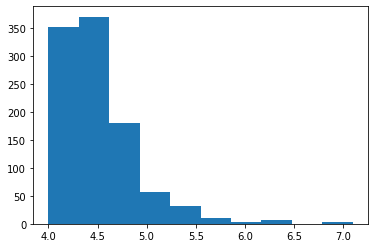

In [0]:
plt.hist(nankai_summary_df.magnitude)

The products in for the event, 'ci3144585', include: ['associate', 'dyfi', 'focal-mechanism', 'general-link', 'impact-text', 'moment-tensor', 'nearby-cities', 'origin', 'phase-data', 'shakemap', 'trump-shakemap']
depth: 18.2
event-description: ShakeMap Atlas v4
event-type: ACTUAL
eventsource: ci
eventsourcecode: 3144585
eventtime: 1994-01-17T12:30:55.000Z
gmice: WGRW12
latitude: 34.2130
longitude: -118.5370
magnitude: 6.7
map-status: automatic
maximum-latitude: 37.717
maximum-longitude: -114.117
maxmmi: 8.794
maxmmi-grid: 8.794
maxpga: 0.87
maxpga-grid: 0.87
maxpgv: 4.635
maxpgv-grid: 4.635
maxpsa03: 1.706
maxpsa03-grid: 1.706
maxpsa10: 1.258
maxpsa10-grid: 1.258
maxpsa30: 0.333
maxpsa30-grid: 0.333
minimum-latitude: 30.7
minimum-longitude: -122.617
pdl-client-version: Version 2.1.0 2019-03-07
process-timestamp: 2019-09-25T21:51:05Z
review-status: automatic
shakemap-code-version: 4.0.2+152.gf8cc092
version: 1
Shakemap Contents: ['contents.xml', 'download/attenuation_curves.json', 'down

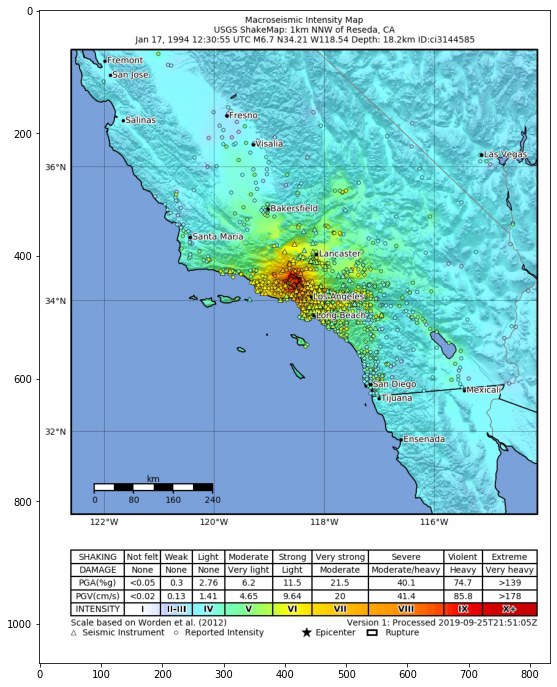

In [0]:
from PIL import Image
import io

ci3144585 = get_event_by_id('ci3144585');
print("The products in for the event, '%s', include: %s" %
     (ci3144585.id, ci3144585.products))

product = ci3144585.getProducts('shakemap')[0]

## list the product properties
for prop in product.properties:
    print('%s: %s' % (prop, product[prop]))

## list content
print('Shakemap Contents: %s' % product.contents)

## Get the intensity image
## (use getContent('intensity.jpg', 'intensity.jpg') to save a local file)
img = product.getContentBytes('intensity.jpg')[0]

image = Image.open(io.BytesIO(img))

plt.figure(figsize=(10, 12))
plt.imshow(np.asarray(image))
plt.show()

In [0]:
product = ci3144585.getProducts('focal-mechanism')[0]

## list the product properties
for prop in product.properties:
    print('%s: %s' % (prop, product[prop]))

evaluation-status: reviewed
eventParametersPublicID: quakeml:us.anss.org/eventParameters/C011794B
eventsource: gcmt
eventsourcecode: c011794b
n-axis-azimuth: 297
n-axis-plunge: 16
nodal-plane-1-dip: 42
nodal-plane-1-rake: 65
nodal-plane-1-strike: 278
nodal-plane-2-dip: 53
nodal-plane-2-rake: 111
nodal-plane-2-strike: 130
p-axis-azimuth: 205
p-axis-plunge: 6
quakeml-publicid: quakeml:us.anss.org/focalmechanism/C011794B/Mwc
review-status: reviewed
t-axis-azimuth: 97
t-axis-plunge: 73


Explore basemap here: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html